In [ ]:
Objective: To perform topic Modelling using NMF & LSA for information extraction (latent topics present in documents.) additionally apart from LDA .

Approach : LSA or Trucated SVD - predefine the no. of topics initially 30 and then obtained a amonut of varaince explained by each topic/component.
After 20th component no significant dip in amount of variance was observed.Hence, took final no. of topics to be 20.
1) Many topics of LSA were common with topics of LDA
2) Many topic words were common among several topics like contained same anchors yob , dob , age, name not sounding similiar
3) none topic words have anchor i.e. transaction related information 
4) topic coherence score is low in comparison to LDA.

NMF - initially provided 30 no. of components to develop an NMF model.
Many topics were similiar to topics of LDA & LSA. Topic coherence is better than that of LDA.non additional information extracted from them.


In [23]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from transformers import BertTokenizer, BertModel
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import word2vec
import numpy as np
import pandas as pd
import ast
import re
import torch
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

In [3]:
from nltk.tokenize import word_tokenize 

In [4]:
df=pd.read_excel("Additional words in topics tf idf bi tri.xlsx")

In [2]:
df=pd.read_excel("Additional words in topics tf idf bi tri.xlsx")

In [6]:
df.head()
df.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1,inplace=True)

In [7]:
df

,V_COMMENTS,Counts,V_COMMENTS_2,Tokens,id_2_feature,TFIDF_Feature,Topic_tfidf_lda,All_Topic_tfidf_Probabilities,TF_tfidf_Topic_No,TF IDF Topic words
0,mismatch id number_nric,67150,mismatch id number nric,"['mismatch', 'i', 'd', 'number', 'nric']","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]","[(0, 0.547290750424587), (1, 0.547516376900071...","0.199*""nric"" + 0.130*""date"" + 0.085*""birth"" + ...","[(0, 0.037396688), (1, 0.03744973), (2, 0.0373...",4,"['nric', 'date', 'birth', 'number', 'd', 'i', ..."
1,mismatch id number_nric\n,40137,mismatch id number nric,"['mismatch', 'i', 'd', 'number', 'nric']","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]","[(0, 0.547290750424587), (1, 0.547516376900071...","0.199*""nric"" + 0.130*""date"" + 0.085*""birth"" + ...","[(0, 0.037396688), (1, 0.037449747), (2, 0.037...",4,"['nric', 'date', 'birth', 'number', 'd', 'i', ..."
2,mismatch year of birth (yob),27341,mismatch year birth yob,"['mismatch', 'year', 'birth', 'yob']","[(2, 1), (5, 1), (6, 1), (7, 1)]","[(2, 0.06249879031496278), (5, 0.5453915180875...","0.162*""yob"" + 0.111*""year"" + 0.073*""birth"" + 0...","[(0, 0.038604278), (1, 0.038610753), (2, 0.038...",3,"['yob', 'year', 'birth', 'infer', 'bear', 'ref..."
3,mismatch id number_nric,25793,mismatch id number nric,"['mismatch', 'i', 'd', 'number', 'nric']","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]","[(0, 0.547290750424587), (1, 0.547516376900071...","0.199*""nric"" + 0.130*""date"" + 0.085*""birth"" + ...","[(0, 0.037396688), (1, 0.037449766), (2, 0.037...",4,"['nric', 'date', 'birth', 'number', 'd', 'i', ..."
4,mismatch full legal name â€“ name does not sou...,19127,mismatch full name sound similar,"['mismatch', 'full', 'name', 'sound', 'similar']","[(2, 1), (8, 1), (9, 1), (10, 1), (11, 1)]","[(2, 0.030451784805766515), (8, 0.473060193932...","0.137*""name"" + 0.051*""match"" + 0.039*""full"" + ...","[(0, 0.037577048), (1, 0.040632684), (2, 0.037...",17,"['name', 'match', 'full', 'passport', 'similar..."
...,...,...,...,...,...,...,...,...,...,...
221569,"mismatch - name, nric, date of birth, profile,...",1,mismatch name nric date birth profile customer...,"['mismatch', 'name', 'nric', 'date', 'birth', ...","[(2, 1), (3, 3), (4, 1), (5, 3), (9, 3), (12, ...","[(2, 0.005990920965347929), (3, 0.227682171168...","0.199*""nric"" + 0.130*""date"" + 0.085*""birth"" + ...","[(0, 0.02934474), (1, 0.031117253), (2, 0.0294...",4,"['nric', 'date', 'birth', 'number', 'd', 'i', ..."
221570,"mismatch - name, nric, date of birth, profile,...",1,mismatch name nric date birth profile customer...,"['mismatch', 'name', 'nric', 'date', 'birth', ...","[(2, 1), (3, 3), (4, 1), (5, 3), (9, 3), (12, ...","[(2, 0.0085888069800516), (3, 0.32641362359475...","0.199*""nric"" + 0.130*""date"" + 0.085*""birth"" + ...","[(0, 0.031628136), (1, 0.033863842), (2, 0.031...",4,"['nric', 'date', 'birth', 'number', 'd', 'i', ..."
221571,mismatch id number_nric. watch person (noraini...,1,mismatch id number nric watch person bank cus...,"['mismatch', 'i', 'd', 'number', 'nric', 'watc...","[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (15, ...","[(0, 0.27243957135183583), (1, 0.2725518874840...","0.199*""nric"" + 0.130*""date"" + 0.085*""birth"" + ...","[(0, 0.03383267), (1, 0.033776768), (2, 0.0337...",4,"['nric', 'date', 'birth', 'number', 'd', 'i', ..."
221572,mismatch id number_nric. watch person (noraini...,1,mismatch id number nric watch person bank cus...,"['mismatch', 'i', 'd', 'number', 'nric', 'watc...","[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (15, ...","[(0, 0.27243957135183583), (1, 0.2725518874840...","0.199*""nric"" + 0.130*""date"" + 0.085*""birth"" + ...","[(0, 0.03383269), (1, 0.03377677), (2, 0.03370...",4,"['nric', 'date', 'birth', 'number', 'd', 'i', ..."


In [8]:
df["V_COMMENTS_2"]=df["V_COMMENTS_2"].apply(lambda x:"" if pd.isna(x) else x)
df=df[df["V_COMMENTS_2"].apply(lambda x: len(x)!=0)]

In [9]:
df["V_COMMENTS_2"].apply(lambda x: type(x)).unique()

array([<class 'str'>], dtype=object)

In [10]:
# df["Topic"].apply(lambda x:pd.isna(x))
df["Tokens"]=df["Tokens"].apply(lambda x: ast.literal_eval(x))

In [11]:

df=df[df["Tokens"].apply(lambda x: len(x)!=0)]

In [12]:
df.shape

(221531, 10)

In [13]:
df_groups=df.groupby("TF_tfidf_Topic_No")
df["TF_tfidf_Topic_No"].value_counts().sort_values(ascending=False)

TF_tfidf_Topic_No
6     41846
3     31042
14    25252
4     18335
8     15784
5     13528
10    12982
17    10520
16     9395
0      9305
1      8627
9      6395
12     5418
11     4608
19     2773
7      1916
15     1124
2      1070
18      953
13      658
Name: count, dtype: int64

## PCA 

In [26]:
# importing all necessary modules
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [28]:
model1= gensim.models.Word2Vec(df["Tokens"].to_list(), min_count=1,
                                vector_size=100, window=5,sg=0)

In [31]:
df["Word2vec"]=df["Tokens"].apply(lambda x: np.mean(np.array([ model1.wv[token] for token in x]),axis=0))

In [43]:
# df["Word2vec"].values
pca = PCA(n_components=10)
# df["Word2vec"].values
word_vectors_pca = pca.fit_transform(df["Word2vec"].to_list())

In [45]:
# Step 3: Analysis
# Let's print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.32893946 0.10619583 0.09285171 0.0618923  0.04593469 0.03966629
 0.03249641 0.02190066 0.01851373 0.01787907]


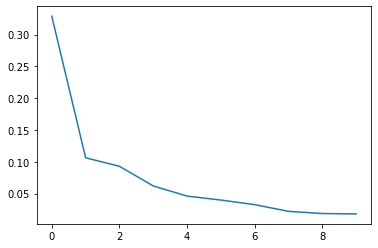

In [48]:
plt.plot(range(10),pca.explained_variance_ratio_)

In [49]:
# df["Word2vec"].values
pca = PCA(n_components=6)
# df["Word2vec"].values
word_vectors_pca = pca.fit_transform(df["Word2vec"].to_list())
# Step 3: Analysis
# Let's print the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.32893946 0.10619583 0.09285171 0.0618923  0.04593469 0.03966629]


In [52]:
word_vectors_pca

array([[ 7.48167825, -4.24017812,  2.92002065,  2.24236781,  0.84839094,
        -3.88808636],
       [ 7.48167825, -4.24017812,  2.92002065,  2.24236781,  0.84839094,
        -3.88808636],
       [ 7.004845  ,  3.28103374, -3.32474375,  0.02597638, -0.77069614,
        -1.3630854 ],
       ...,
       [ 1.98055645, -3.31149697,  2.05781643,  3.13437159,  1.48935763,
        -1.97629894],
       [ 1.98055645, -3.31149697,  2.05781643,  3.13437159,  1.48935763,
        -1.97629894],
       [-3.24005606,  2.94727156,  2.99183448,  1.78363064, -0.27862331,
        -0.50307852]])

In [53]:

# # Step 4: Visualize the transformed data
# import matplotlib.pyplot as plt

# plt.figure(figsize=(8, 6))
# for i in range(len(word_vectors_pca)):
#     plt.scatter(word_vectors_pca[i, 0], word_vectors_pca[i, 1], label=f"Sentence {i+1}")

# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.legend()
# plt.title("PCA on Word2Vec Embeddings")
# plt.show()





array(['mismatch id number nric', 'mismatch id number nric',
       'mismatch year birth yob', ...,
       'mismatch id number nric  watch person bank customer nric gcif  pep transaction apex  customers nric',
       'mismatch id number nric  watch person bank customer nric gcif  pep transaction apex  customers nric',
       'mismatch profile adverse news reported detained punjab police patiala alleged involvement planning terror acts target killings  case registered unlawful activities prevention act  information reported apex account customer shows active transaction since  hence highly unlikely watchperson customer '],
      dtype=object)

## Truncated SVD

In [14]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer



# Step 1: Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["V_COMMENTS_2"].values)

In [15]:
# Step 2: Apply Truncated SVD
n_components = 2  # Number of components to keep
svd = TruncatedSVD(n_components=30)
X_svd = svd.fit_transform(X)

In [16]:

# Step 3: Analysis
# Let's print the explained variance ratio
print("Explained variance ratio:", svd.explained_variance_ratio_)

Explained variance ratio: [0.04463212 0.03858759 0.02387768 0.02941527 0.02057811 0.01794788
 0.01663789 0.01416847 0.01301057 0.01114032 0.00981412 0.00965121
 0.00921514 0.00889325 0.00809416 0.0077823  0.00654437 0.00615887
 0.00610205 0.00583422 0.00532075 0.00492994 0.00479775 0.00471826
 0.00457355 0.00443979 0.00422304 0.00411106 0.00405652 0.00378432]


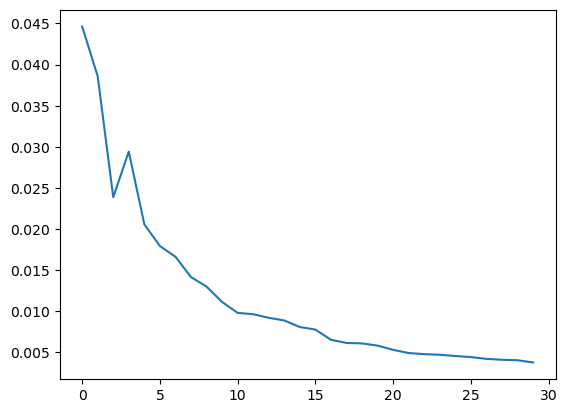

In [17]:
plt.plot(range(30),svd.explained_variance_ratio_)

In [76]:
svd.components_

array([[ 1.94233854e-04,  2.36771292e-06,  1.91767434e-06, ...,
         9.63863059e-06,  1.75765554e-05,  2.38590622e-05],
       [ 4.39055848e-04,  5.44603877e-06,  2.63190286e-06, ...,
         1.50159519e-05,  2.66035991e-05,  4.47116361e-05],
       [ 7.75378989e-05,  2.46999007e-06,  3.15150629e-06, ...,
         1.00313228e-05,  1.91295511e-05,  3.45455129e-05],
       ...,
       [ 5.24514450e-04, -6.82325023e-06,  4.13494592e-05, ...,
         1.13918633e-04,  2.00742424e-04,  4.03339945e-04],
       [-1.00272000e-04,  1.43997230e-05,  2.03183136e-05, ...,
         1.06939485e-04,  1.81030452e-04,  3.83474010e-04],
       [ 2.39988629e-05,  1.58539339e-06, -5.67742901e-05, ...,
        -1.36148068e-04, -2.21719103e-04, -5.24447222e-04]])

In [19]:
components=svd.components_
vocab = vectorizer.get_feature_names_out()

In [20]:
# Extract top words for each topic
n_top_words = 10
terms = vectorizer.get_feature_names_out()

def get_topics(components, feature_names, n_top_words):
    topics = []
    for topic_idx, topic in enumerate(components):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        topics.append(top_features)
    return topics

topics = get_topics(svd.components_, terms, n_top_words)

array(['mismatch id number nric', 'mismatch id number nric',
       'mismatch year birth yob', ...,
       'mismatch id number nric  watch person bank customer nric gcif  pep transaction apex  customers nric',
       'mismatch id number nric  watch person bank customer nric gcif  pep transaction apex  customers nric',
       'mismatch profile adverse news reported detained punjab police patiala alleged involvement planning terror acts target killings  case registered unlawful activities prevention act  information reported apex account customer shows active transaction since  hence highly unlikely watchperson customer '],
      dtype=object)

In [22]:
print(topics)

[['yob', 'birth', 'year', 'mismatch', 'customer', 'inferred', 'watch', 'watchperson', 'nric', 'date'], ['nric', 'date', 'dob', 'person', 'watch', 'customer', 'number', 'name', 'id', 'trinity'], ['reported', 'customer', 'unlikely', 'watchperson', 'profile', 'account', 'highly', 'malaysia', 'secretary', 'years'], ['dob', 'within', 'range', 'possible', 'fall', 'tool', 'cscdd', 'refer', 'calculator', 'date'], ['name', 'match', 'full', 'fathers', 'sound', 'similar', 'customers', 'passport', 'dob', 'yob'], ['years', 'birth', 'date', 'already', 'name', 'born', 'age', 'year', 'old', 'full'], ['years', 'trinity', 'already', 'nric', 'id', 'age', 'old', 'number', 'born', 'year'], ['refer', 'watchperson', 'vs', 'refinitiv', 'born', 'year', 'id', 'number', 'birth', 'watchpersons'], ['relationship', 'deemed', 'news', 'happened', 'relevant', 'ago', 'updaterecurrence', 'incident', 'business', 'refer'], ['reported', 'secretary', 'deputy', 'ministry', 'age', 'vs', 'already', 'years', 'match', 'refer'], 

In [26]:
# Create a Gensim dictionary and corpus for coherence calculation
texts = [doc.split() for doc in df["V_COMMENTS_2"].values]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [27]:
# Calculate coherence score using Gensim's CoherenceModel
coherence_model = CoherenceModel(
    topics=topics,
    texts=texts,
    dictionary=dictionary,
    coherence='c_v'  # You can also use 'u_mass', 'c_uci', 'c_npmi'
)
coherence_score = coherence_model.get_coherence()

print("Topics:")
for i, topic in enumerate(topics):
    print(f"Topic {i + 1}: {topic}")

print("\nCoherence Score:", coherence_score)

Topics:
Topic 1: ['yob', 'birth', 'year', 'mismatch', 'customer', 'inferred', 'watch', 'watchperson', 'nric', 'date']
Topic 2: ['nric', 'date', 'dob', 'person', 'watch', 'customer', 'number', 'name', 'id', 'trinity']
Topic 3: ['reported', 'customer', 'unlikely', 'watchperson', 'profile', 'account', 'highly', 'malaysia', 'secretary', 'years']
Topic 4: ['dob', 'within', 'range', 'possible', 'fall', 'tool', 'cscdd', 'refer', 'calculator', 'date']
Topic 5: ['name', 'match', 'full', 'fathers', 'sound', 'similar', 'customers', 'passport', 'dob', 'yob']
Topic 6: ['years', 'birth', 'date', 'already', 'name', 'born', 'age', 'year', 'old', 'full']
Topic 7: ['years', 'trinity', 'already', 'nric', 'id', 'age', 'old', 'number', 'born', 'year']
Topic 8: ['refer', 'watchperson', 'vs', 'refinitiv', 'born', 'year', 'id', 'number', 'birth', 'watchpersons']
Topic 9: ['relationship', 'deemed', 'news', 'happened', 'relevant', 'ago', 'updaterecurrence', 'incident', 'business', 'refer']
Topic 10: ['reported'

In [28]:
# Calculate coherence score using Gensim's CoherenceModel
coherence_model = CoherenceModel(
    topics=topics[:20],
    texts=texts,
    dictionary=dictionary,
    coherence='c_v'  # You can also use 'u_mass', 'c_uci', 'c_npmi'
)
coherence_score = coherence_model.get_coherence()

print("Topics:")
for i, topic in enumerate(topics):
    print(f"Topic {i + 1}: {topic}")

print("\nCoherence Score:", coherence_score)

Topics:
Topic 1: ['yob', 'birth', 'year', 'mismatch', 'customer', 'inferred', 'watch', 'watchperson', 'nric', 'date']
Topic 2: ['nric', 'date', 'dob', 'person', 'watch', 'customer', 'number', 'name', 'id', 'trinity']
Topic 3: ['reported', 'customer', 'unlikely', 'watchperson', 'profile', 'account', 'highly', 'malaysia', 'secretary', 'years']
Topic 4: ['dob', 'within', 'range', 'possible', 'fall', 'tool', 'cscdd', 'refer', 'calculator', 'date']
Topic 5: ['name', 'match', 'full', 'fathers', 'sound', 'similar', 'customers', 'passport', 'dob', 'yob']
Topic 6: ['years', 'birth', 'date', 'already', 'name', 'born', 'age', 'year', 'old', 'full']
Topic 7: ['years', 'trinity', 'already', 'nric', 'id', 'age', 'old', 'number', 'born', 'year']
Topic 8: ['refer', 'watchperson', 'vs', 'refinitiv', 'born', 'year', 'id', 'number', 'birth', 'watchpersons']
Topic 9: ['relationship', 'deemed', 'news', 'happened', 'relevant', 'ago', 'updaterecurrence', 'incident', 'business', 'refer']
Topic 10: ['reported'

In [80]:
df

,V_COMMENTS,Counts,V_COMMENTS_2,Tokens,id_2_feature,TFIDF_Feature,Topic_tfidf_lda,All_Topic_tfidf_Probabilities,TF_tfidf_Topic_No,TF IDF Topic words,V_COMMENTS_PROCESSED,Word2vec
0,mismatch id number_nric,67150,mismatch id number nric,"[mismatch, i, d, number, nric]","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]","[(0, 0.547290750424587), (1, 0.547516376900071...","0.199*""nric"" + 0.130*""date"" + 0.085*""birth"" + ...","[(0, 0.037396688), (1, 0.03744973), (2, 0.0373...",4,"['nric', 'date', 'birth', 'number', 'd', 'i', ...",mismatch id number nric,"[-3.1662517, 1.3042483, -1.8621927, -0.4221082..."
1,mismatch id number_nric\n,40137,mismatch id number nric,"[mismatch, i, d, number, nric]","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]","[(0, 0.547290750424587), (1, 0.547516376900071...","0.199*""nric"" + 0.130*""date"" + 0.085*""birth"" + ...","[(0, 0.037396688), (1, 0.037449747), (2, 0.037...",4,"['nric', 'date', 'birth', 'number', 'd', 'i', ...",mismatch id number nric,"[-3.1662517, 1.3042483, -1.8621927, -0.4221082..."
2,mismatch year of birth (yob),27341,mismatch year birth yob,"[mismatch, year, birth, yob]","[(2, 1), (5, 1), (6, 1), (7, 1)]","[(2, 0.06249879031496278), (5, 0.5453915180875...","0.162*""yob"" + 0.111*""year"" + 0.073*""birth"" + 0...","[(0, 0.038604278), (1, 0.038610753), (2, 0.038...",3,"['yob', 'year', 'birth', 'infer', 'bear', 'ref...",mismatch year of birth yob,"[-2.5767035, 0.70284855, -2.4301593, -0.362365..."
3,mismatch id number_nric,25793,mismatch id number nric,"[mismatch, i, d, number, nric]","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]","[(0, 0.547290750424587), (1, 0.547516376900071...","0.199*""nric"" + 0.130*""date"" + 0.085*""birth"" + ...","[(0, 0.037396688), (1, 0.037449766), (2, 0.037...",4,"['nric', 'date', 'birth', 'number', 'd', 'i', ...",mismatch id number nric,"[-3.1662517, 1.3042483, -1.8621927, -0.4221082..."
4,mismatch full legal name â€“ name does not sou...,19127,mismatch full name sound similar,"[mismatch, full, name, sound, similar]","[(2, 1), (8, 1), (9, 1), (10, 1), (11, 1)]","[(2, 0.030451784805766515), (8, 0.473060193932...","0.137*""name"" + 0.051*""match"" + 0.039*""full"" + ...","[(0, 0.037577048), (1, 0.040632684), (2, 0.037...",17,"['name', 'match', 'full', 'passport', 'similar...",mismatch full name â name does not sound similar,"[-2.2403824, -0.041814663, -1.5657326, 1.15222..."
...,...,...,...,...,...,...,...,...,...,...,...,...
221569,"mismatch - name, nric, date of birth, profile,...",1,mismatch name nric date birth profile customer...,"[mismatch, name, nric, date, birth, profile, c...","[(2, 1), (3, 3), (4, 1), (5, 3), (9, 3), (12, ...","[(2, 0.005990920965347929), (3, 0.227682171168...","0.199*""nric"" + 0.130*""date"" + 0.085*""birth"" + ...","[(0, 0.02934474), (1, 0.031117253), (2, 0.0294...",4,"['nric', 'date', 'birth', 'number', 'd', 'i', ...",mismatch name nric date of birth profile cus...,"[-1.6347831, 0.092932574, -0.21436688, 0.52262..."
221570,"mismatch - name, nric, date of birth, profile,...",1,mismatch name nric date birth profile customer...,"[mismatch, name, nric, date, birth, profile, c...","[(2, 1), (3, 3), (4, 1), (5, 3), (9, 3), (12, ...","[(2, 0.0085888069800516), (3, 0.32641362359475...","0.199*""nric"" + 0.130*""date"" + 0.085*""birth"" + ...","[(0, 0.031628136), (1, 0.033863842), (2, 0.031...",4,"['nric', 'date', 'birth', 'number', 'd', 'i', ...",mismatch name nric date of birth profile cus...,"[-2.086623, 0.11979292, -0.78680867, 0.4638282..."
221571,mismatch id number_nric. watch person (noraini...,1,mismatch id number nric watch person bank cus...,"[mismatch, i, d, number, nric, watch, person, ...","[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (15, ...","[(0, 0.27243957135183583), (1, 0.2725518874840...","0.199*""nric"" + 0.130*""date"" + 0.085*""birth"" + ...","[(0, 0.03383267), (1, 0.033776768), (2, 0.0337...",4,"['nric', 'date', 'birth', 'number', 'd', 'i', ...",mismatch id number nric. watch person is a ...,"[-1.6440406, 0.5083484, -0.30340177, 0.2

In [ ]:
1) Many topics of LSA were common with topics of LDA
2) Many topic words were common among several topics like yob , dob , age, name not sounding similiar
3) none topic words have transaction related information 
4) topic coherence score is low in comparison to LDA.

In [79]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for i in range(4):
  wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,background_color='black', relative_scaling=0).generate(topic_word_list[i])
  plt.imshow(wc)
  plt.title(f"Topic{i+1}")
  plt.axis("off")
  plt.show()

Could not fetch URL https://pypi.org/simple/wordcloud/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/wordcloud/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)'))) - skipping


ERROR: Could not find a version that satisfies the requirement wordcloud (from versions: none)
ERROR: No matching distribution found for wordcloud


ModuleNotFoundError: No module named 'wordcloud'

In [30]:
X

<221531x46014 sparse matrix of type '<class 'numpy.float64'>'
	with 5010708 stored elements in Compressed Sparse Row format>

### NMF

In [33]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=30, random_state=1)
# W = NMF_model.fit_transform(X)
# H = NMF_model.components_

# Step 1: Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["V_COMMENTS_2"].values)

feature_names = vectorizer.get_feature_names_out()
nmf_model.fit(X)
topics = []
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    topics.append(top_words)

To obtain optimum number of components for NMF use reconstruction error, topic coherence score.

In [34]:
# Step 4: Prepare data for coherence calculation
texts = [doc.split() for doc in df["V_COMMENTS_2"].values]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


In [35]:
# Step 5: Calculate coherence
coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print("Topic Coherence Score:", coherence_score)

Topic Coherence Score: 0.710412016422337


In [37]:
print(topics)


[['yob', 'year', 'birth', 'worldcheck', 'mismatch', 'persons', 'per', 'watch', 'customers', 'gbffspfquickidfd'], ['date', 'birth', 'watch', 'person', 'customer', 'mismatch', 'per', 'idpassport', 'as', 'host'], ['account', 'active', 'transaction', 'apex', 'opened', 'customer', 'actively', 'saving', 'malaysia', 'still'], ['within', 'dob', 'range', 'possible', 'fall', 'tool', 'cscdd', 'watch', 'refer', 'person'], ['match', 'name', 'gender', 'nationality', 'full', 'rfi', 'definition', 'nric', 'suggest', 'insufficient'], ['already', 'years', 'age', 'year', 'birth', 'watch', 'per', 'person', 'world', 'check'], ['nric', 'mismatch', 'customer', 'watch', 'person', 'id', 'gcif', 'watchperson', 'uco', 'information'], ['refer', 'vs', 'refinitiv', 'year', 'watchperson', 'birth', 'customer', 'mismatch', 'yob', 'record'], ['deemed', 'relevant', 'relationship', 'ago', 'happened', 'updaterecurrence', 'incident', 'business', 'news', 'updateinformation'], ['reported', 'secretary', 'deputy', 'ministry', '

[['yob',
  'year',
  'birth',
  'worldcheck',
  'mismatch',
  'persons',
  'per',
  'watch',
  'customers',
  'gbffspfquickidfd'],
 ['date',
  'birth',
  'watch',
  'person',
  'customer',
  'mismatch',
  'per',
  'idpassport',
  'as',
  'host'],
 ['account',
  'active',
  'transaction',
  'apex',
  'opened',
  'customer',
  'actively',
  'saving',
  'malaysia',
  'still'],
 ['within',
  'dob',
  'range',
  'possible',
  'fall',
  'tool',
  'cscdd',
  'watch',
  'refer',
  'person'],
 ['match',
  'name',
  'gender',
  'nationality',
  'full',
  'rfi',
  'definition',
  'nric',
  'suggest',
  'insufficient'],
 ['already',
  'years',
  'age',
  'year',
  'birth',
  'watch',
  'per',
  'person',
  'world',
  'check'],
 ['nric',
  'mismatch',
  'customer',
  'watch',
  'person',
  'id',
  'gcif',
  'watchperson',
  'uco',
  'information'],
 ['refer',
  'vs',
  'refinitiv',
  'year',
  'watchperson',
  'birth',
  'customer',
  'mismatch',
  'yob',
  'record'],
 ['deemed',
  'relevant',
  'r

In [41]:
for i in topics:
    print(i)


['yob', 'year', 'birth', 'worldcheck', 'mismatch', 'persons', 'per', 'watch', 'customers', 'gbffspfquickidfd']
['date', 'birth', 'watch', 'person', 'customer', 'mismatch', 'per', 'idpassport', 'as', 'host']
['account', 'active', 'transaction', 'apex', 'opened', 'customer', 'actively', 'saving', 'malaysia', 'still']
['within', 'dob', 'range', 'possible', 'fall', 'tool', 'cscdd', 'watch', 'refer', 'person']
['match', 'name', 'gender', 'nationality', 'full', 'rfi', 'definition', 'nric', 'suggest', 'insufficient']
['already', 'years', 'age', 'year', 'birth', 'watch', 'per', 'person', 'world', 'check']
['nric', 'mismatch', 'customer', 'watch', 'person', 'id', 'gcif', 'watchperson', 'uco', 'information']
['refer', 'vs', 'refinitiv', 'year', 'watchperson', 'birth', 'customer', 'mismatch', 'yob', 'record']
['deemed', 'relevant', 'relationship', 'ago', 'happened', 'updaterecurrence', 'incident', 'business', 'news', 'updateinformation']
['reported', 'secretary', 'deputy', 'ministry', 'bangladesh

In [86]:
# topic_word_list = []
# def get_topics(components): 
#       for i, comp in enumerate(components):
#         terms_comp = zip(vocab,comp)
#         sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:9]
#         topic=" "
#         for t in sorted_terms:
#             topic= topic + ' ' + t[0]
#         topic_word_list.append(topic)
#         print(topic_word_list)
#       return topic_word_list
# get_topics(H)

# Step 3: Extract the topics
# feature_names = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    topics.append(top_words)


# Step 5: Calculate coherence
coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print("Topic Coherence Score:", coherence_score)


['  yob inferred year persons birth customers per check world']
['  yob inferred year persons birth customers per check world', '  nric date birth watch person number id trinity mismatch']
['  yob inferred year persons birth customers per check world', '  nric date birth watch person number id trinity mismatch', '  customer reported person unlikely profile account watchperson malaysia secretary']
['  yob inferred year persons birth customers per check world', '  nric date birth watch person number id trinity mismatch', '  customer reported person unlikely profile account watchperson malaysia secretary', '  dob within range possible fall date tool watch cscdd']
['  yob inferred year persons birth customers per check world', '  nric date birth watch person number id trinity mismatch', '  customer reported person unlikely profile account watchperson malaysia secretary', '  dob within range possible fall date tool watch cscdd', '  name full match fathers sound similar passport customers fa

['  yob inferred year persons birth customers per check world',
 '  nric date birth watch person number id trinity mismatch',
 '  customer reported person unlikely profile account watchperson malaysia secretary',
 '  dob within range possible fall date tool watch cscdd',
 '  name full match fathers sound similar passport customers father',
 '  years already age year born old world check birth',
 '  deemed relationship happened relevant ago news updaterecurrence incident business',
 '  birth year yob refer refinitiv watchperson vs mismatch customer']

In [ ]:





# Step 4: Visualize the transformed data
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i in range(len(X_svd)):
    plt.scatter(X_svd[i, 0], X_svd[i, 1], label=f"Document {i+1}")

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.title("Truncated SVD on Text Data")
plt.show()


In [ ]:
# for i in range(10):
#      plt.boxplot(df_grp["sim_score"].get_group(int(i)))
for i in list(df_grp.groups.keys()):
    print(i)
    print(df_grp["sim_score"].get_group(i).mean())

In [ ]:
# df_1=df_grp.get_group(1.0)
# df_grp["Topic words"]

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

In [ ]:
# Convert GloVe format to word2vec format
glove_input_file = 'glove.6B/glove.6B.100d.txt'
word2vec_output_file = 'glove.6B/glove.6B.100d.word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)


In [ ]:
# Load the converted model
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)



# Example usage
vector = glove_model['example']
similar_words = glove_model.most_similar('example')

print("Vector representation of 'example':", vector)
print("Similar words to 'example':", similar_words)

In [ ]:
### T-SNE & PCA

In [ ]:
def tsne_plot():
    labels = []
    tokens = []
    
    # Extracting words and their vectors from our trained model1 
    for word in model1.wv.index_to_key:
        tokens.append(model1.wv[word])
        labels.append(word)
    
    # Train t-SNE 
    tsne_model1 = TSNE(perplexity=45, n_components=2, init='pca', n_iter=250, random_state=23)
    new_values = tsne_model1.fit_transform(tokens)
    x = []
    y = []
    
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
        plt.xlabel("dimension 1")
        plt.ylabel("dimension 2")
    plt.show()
# Words that occur atleast











In [ ]:
# tsne_plot()